In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
df = pd.read_csv("Social_Network_Ads_Sample.csv")
print(df.head())  


    User ID  Age  EstimatedSalary  Purchased
0  15624510   19            19000          0
1  15810944   35            20000          0
2  15668575   26            43000          0
3  15603246   27            57000          0
4  15804002   32           150000          1


In [7]:
X = df[['Age', 'EstimatedSalary']]  # Features
y = df['Purchased']  # Target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_pred = model.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 1.00
Confusion Matrix:
 [[2 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



C:\Users\Aditya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


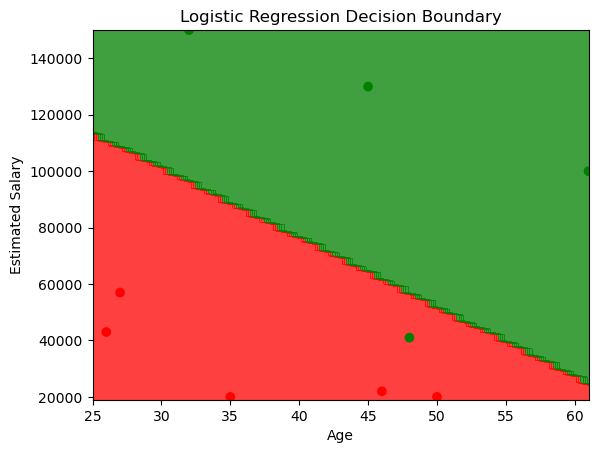

In [19]:
from matplotlib.colors import ListedColormap

X_set, y_set = scaler.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min()-1, X_set[:, 0].max()+1, 1),
                     np.arange(X_set[:, 1].min()-1000, X_set[:, 1].max()+1000, 1000))

plt.contourf(X1, X2, model.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')))
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Logistic Regression Decision Boundary')
plt.show()
